In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import matplotlib.patches as patches
%matplotlib inline

In [2]:
text_color = 'black'
mpl.rcParams['font.weight']='bold'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='Calibri'
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mu_col = '#d0171e'
from adjustText import adjust_text
from highlight_text import ax_text,fig_text

In [3]:
df = pd.read_csv('../misc.csv', index_col='Rk')
df2 = pd.read_csv('../possession.csv', index_col='Rk')

In [4]:
df['Nutmegs'] = df2['Megs']
del(df2)

In [5]:
df = df[(df['90s']>=15) & (df['Fld']>=10) & (df['Nutmegs']>0)]

In [6]:
df['Megsper90'] = df['Nutmegs']/df['90s']
df['Fldper90'] = df['Fld']/df['90s']

In [7]:
outlier_top_megs = df['Megsper90'].quantile(0.985)
outlier_top_fls = df['Fldper90'].quantile(0.985)
outlier_rest = df['Megsper90'].quantile(0.96) + df['Fldper90'].quantile(0.96)

In [8]:
df = df.drop_duplicates()

Text(0.152, 0.857, 'khatri_shreyas')

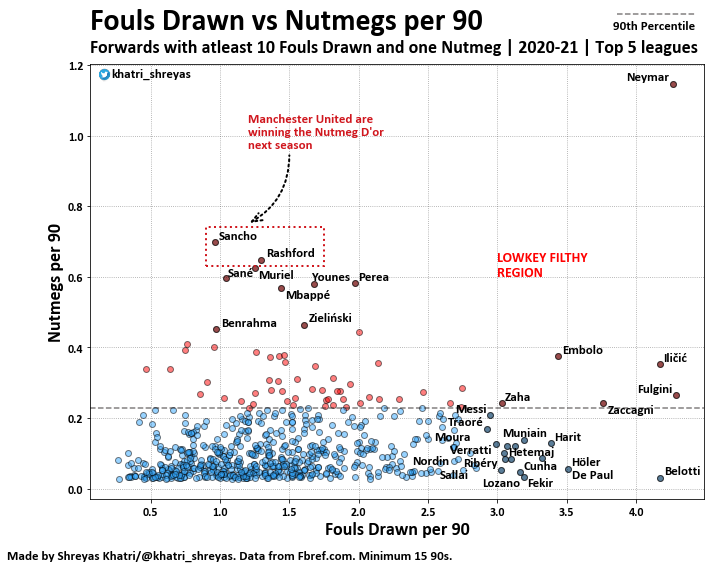

In [9]:
fig, ax = plt.subplots(figsize=(11,8))

megs_cutoff = df['Megsper90'].quantile(0.90)
# SETTING UP GRID
ax.grid(True, ls=':', alpha=0.4, color='black')
ax.axhline(megs_cutoff, c='#2D2828', alpha=0.6, ls='--')

# UPPER 
df_fil = df[(df['Megsper90']>megs_cutoff)]
x, y = (df_fil['Fld']/df_fil['90s']).tolist(), (df_fil['Nutmegs']/df_fil['90s']).tolist()
ax.scatter(x, y, c='red', alpha=0.5, edgecolor='black')
ax.text(3,0.6,'LOWKEY FILTHY\nREGION', c='red', size=14)

# LOWER 
df_fil = df[(df['Megsper90']<=megs_cutoff)]
x, y = (df_fil['Fld']/df_fil['90s']).tolist(), (df_fil['Nutmegs']/df_fil['90s']).tolist()
ax.scatter(x, y,c='#33A8FF', alpha=0.5, edgecolor='black')


#TEXT
texts = []
for x, y, s in zip(df['Fldper90'], df['Megsper90'], df['Player']):
    if len(s.split())==1:
        name = s
    else:
        name = ' '.join(s.split()[1:])
    if x>outlier_top_fls or y>outlier_top_megs or (x+y)>outlier_rest:
        ax.scatter(x, y, c='black', alpha = 0.4)
        texts.append(ax.text(x, y, name, fontdict=dict(color='black', size=13)))
        
adjust_text(texts,force_points=0.2, force_text=0.2,
             expand_points=(1.2, 1.2), expand_text=(1, 1),
             arrowprops=dict(arrowstyle = '-', lw=0.1, alpha = 0))

# ANNOTATION
rect = patches.Rectangle((0.9,0.63),0.85,0.11,linewidth=1,edgecolor=mu_col,ls=':',facecolor='none',lw=2)
ax.add_patch(rect)
arrow = patches.FancyArrowPatch((1.2,0.75),(1.5, 0.95),arrowstyle='<-, head_length=10, head_width=4',
                                ls=':', lw=2, connectionstyle="arc3,rad=.3")
ax.add_patch(arrow)
ax.text(1.2,0.965,'Manchester United are\nwinning the Nutmeg D\'or\nnext season',color=mu_col, size=13)


# TITLES AND LABELS
fig.text(0.125,0.94,'Fouls Drawn vs Nutmegs per 90', size = 30, weight='heavy')
fig.text(0.125,0.90,'Forwards with atleast 10 Fouls Drawn and one Nutmeg | 2020-21 | Top 5 leagues', size = 18)
ax.set_xlabel('Fouls Drawn per 90', size=18, weight='bold')
ax.set_ylabel('Nutmegs per 90', size=18, weight='bold')

fig.text(0.02,0.02,'Made by Shreyas Khatri/@khatri_shreyas. Data from Fbref.com. Minimum 15 90s.', size=13)

ax = fig.add_axes([0.79,0.9,0.1,0.08])
ax.axis('off')
ax.axhline(0.85,c='#2D2828', alpha=0.6, ls='--')
ax.text(-0.05,0.5,'90th Percentile', size=13)

# TWITTER
ax2 = fig.add_axes([0.13,0.85,0.025,0.025])
ax2.axis('off')
img = plt.imread('twitter.png')
ax2.imshow(img)
fig.text(0.152,0.857,'khatri_shreyas', size=13, weight='bold')

#plt.savefig('MegsvFlsDrawn', facecolor='white', dpi=300)